In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
from scipy.stats import pearsonr
plt.style.use('bmh')

## Hotel

In [2]:
accomodation = pd.read_excel('data/accomodation.xlsx')
accomodation

,Year,Hotel,Residence of Friends/ Relatives,Others
0,2021,-,-,-
1,2020,-,-,-
2,2019,53,16,31
3,2018,51,17,32
4,2017,55,18,27
5,2016,61,18,21
6,2015,58,23,19
7,2014,63,19,18
8,2013,65,18,18
9,2012,65,18,17


In [3]:
accomodation.set_index('Year', inplace=True)

In [4]:
accomodation.drop(index=[2021, 2020], inplace=True)

In [5]:
accomodation

,Hotel,Residence of Friends/ Relatives,Others
Year,,,
2019,53,16,31
2018,51,17,32
2017,55,18,27
2016,61,18,21
2015,58,23,19
2014,63,19,18
2013,65,18,18
2012,65,18,17
2011,63,20,17


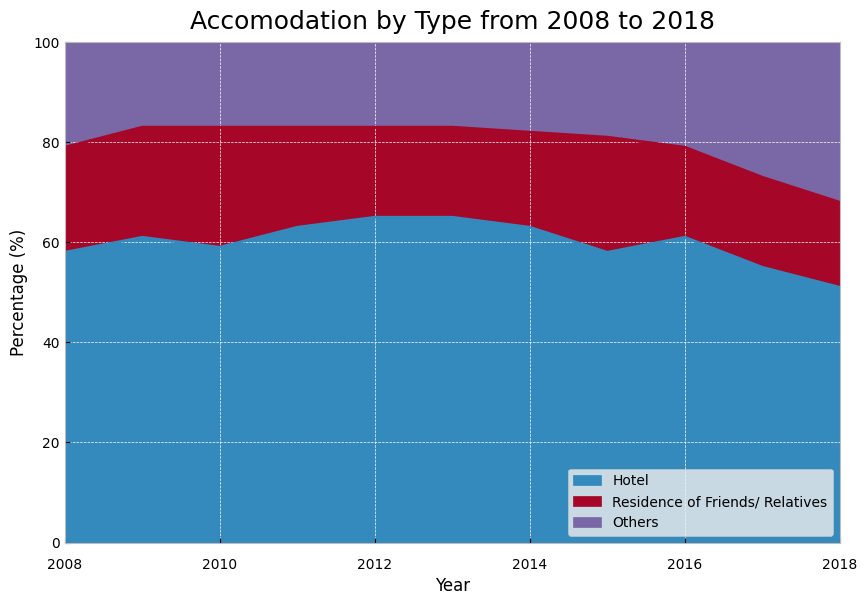

In [6]:
ax = accomodation.plot(kind='area', stacked=True, figsize=(10,6.5))
ax.set_title(label='Accomodation by Type from 2008 to 2018', fontsize=18, y=1.01)
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0, 100)
ax.set_xlim(2008, 2018)
ax.grid(visible=True, which='both', color='w', linestyle='--')
for t in ax.xaxis.get_majorticklabels():
    t.set_y(-.02)
ax.legend(loc='lower right')
plt.savefig('img/accom.png', bbox_inches='tight')
plt.show()

In [7]:
plt.style.use('ggplot')

In [8]:
hotel = pd.read_csv('data/hotel.csv')

In [9]:
hotel

,Month,Hotel Tier,Room Revenue,Gross Lettings,Room Stock
0,Jan-20,Economy,4.857905e+07,424204.13,17254
1,Jan-20,Luxury,1.291470e+08,258498.37,10025
2,Jan-20,Mid-Tier,9.728846e+07,567711.61,22257
3,Jan-20,Upscale,9.424508e+07,347444.86,13709
4,Feb-20,Economy,2.785253e+07,241181.41,17305
...,...,...,...,...,...
123,Jul-22,Upscale,8.017105e+07,262078.44,13183
124,Aug-22,Economy,4.425510e+07,358200.05,16555
125,Aug-22,Luxury,1.043014e+08,203094.41,10112
126,Aug-22,Mid-Tier,9.208905e+07,451782.38,22210


In [10]:
hotel.columns

Index(['Month', 'Hotel Tier', 'Room Revenue', 'Gross Lettings', 'Room Stock'], dtype='object')

In [11]:
econ = hotel[hotel['Hotel Tier'] == 'Economy']
lux = hotel[hotel['Hotel Tier'] == 'Luxury']
mid = hotel[hotel['Hotel Tier'] == 'Mid-Tier']
up = hotel[hotel['Hotel Tier'] == 'Upscale']

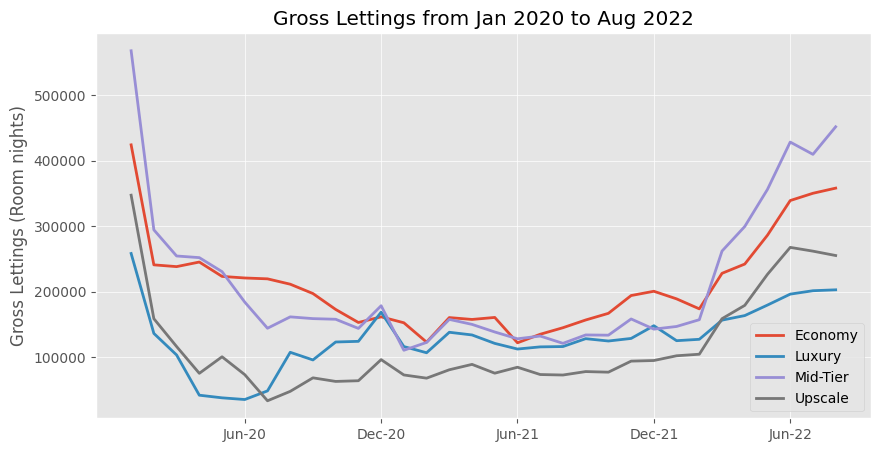

In [12]:
plt.figure(figsize=(10,5))
plt.title('Gross Lettings from Jan 2020 to Aug 2022')
plt.plot(econ['Month'], econ['Gross Lettings'], label='Economy')
plt.plot(lux['Month'], lux['Gross Lettings'], label='Luxury')
plt.plot(mid['Month'], mid['Gross Lettings'], label='Mid-Tier')
plt.plot(up['Month'], up['Gross Lettings'], label='Upscale')
plt.legend(loc='best', fontsize=10)
plt.ylabel('Gross Lettings (Room nights)')
plt.xticks([x for x in econ['Month'] if 'Dec' in x or 'Jun' in x])
plt.savefig('img/gl.png', bbox_inches='tight')
plt.show()

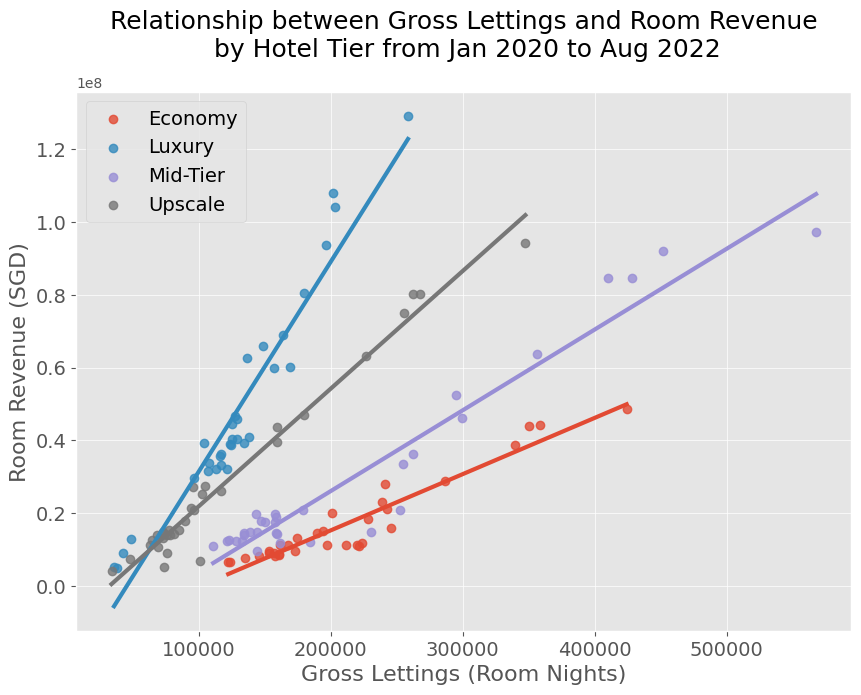

In [13]:
plt.figure(figsize=(10,7))
plt.title(
    "Relationship between Gross Lettings and Room Revenue\n by Hotel Tier from Jan 2020 to Aug 2022",
    fontsize=18,
    y=1.05
)

p1 = sb.regplot(x = "Gross Lettings", y = "Room Revenue", ci = None, data = econ, label='Economy')
p2 = sb.regplot(x = "Gross Lettings", y = "Room Revenue", ci = None, data = lux, label='Luxury')
p3 = sb.regplot(x = "Gross Lettings", y = "Room Revenue", ci = None, data = mid, label='Mid-Tier')
p4 = sb.regplot(x = "Gross Lettings", y = "Room Revenue", ci = None, data = up, label='Upscale')

plt.xlabel('Gross Lettings (Room Nights)', fontsize=16)
plt.ylabel('Room Revenue (SGD)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig('img/hotel.png', bbox_inches='tight')
plt.show()

In [14]:
import scipy

econ_slope = scipy.stats.linregress(x=econ['Gross Lettings'],y=econ['Room Revenue']).slope
lux_slope = scipy.stats.linregress(x=lux['Gross Lettings'],y=lux['Room Revenue']).slope
mid_slope = scipy.stats.linregress(x=mid['Gross Lettings'],y=mid['Room Revenue']).slope
up_slope = scipy.stats.linregress(x=up['Gross Lettings'],y=up['Room Revenue']).slope

print(f'Econ: {econ_slope:.2f}')
print(f'Lux: {lux_slope:.2f}')
print(f'Mid: {mid_slope:.2f}')
print(f'Upscale: {up_slope:.2f}')

Econ: 154.70
Lux: 576.99
Mid: 222.16
Upscale: 323.60


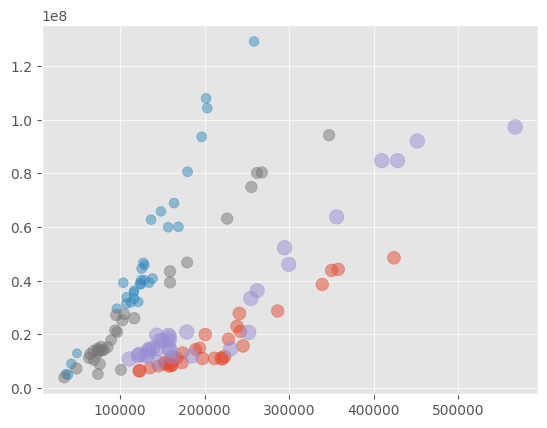

In [15]:
plt.scatter(econ['Gross Lettings'], econ['Room Revenue'], s=econ['Room Stock']/200, alpha=0.5, label='Economy')
plt.scatter(lux['Gross Lettings'], lux['Room Revenue'], s=lux['Room Stock']/200, alpha=0.5, label='Economy')
plt.scatter(mid['Gross Lettings'], mid['Room Revenue'], s=mid['Room Stock']/200, alpha=0.5, label='Economy')
plt.scatter(up['Gross Lettings'], up['Room Revenue'], s=up['Room Stock']/200, alpha=0.5, label='Economy')

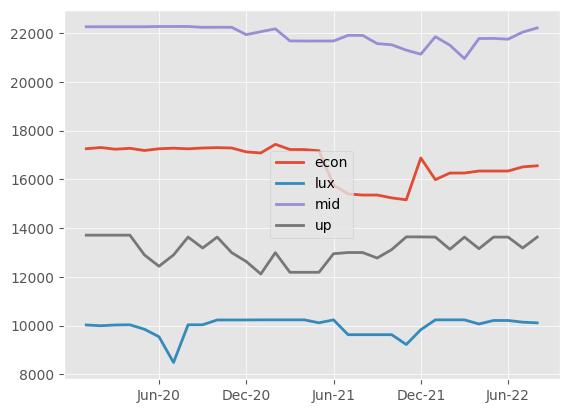

In [16]:
plt.plot(econ['Month'], econ['Room Stock'], label='econ')
plt.plot(lux['Month'], lux['Room Stock'], label='lux')
plt.plot(mid['Month'], mid['Room Stock'], label='mid')
plt.plot(up['Month'], up['Room Stock'], label='up')
plt.legend()
plt.xticks([x for x in econ['Month'] if 'Dec' in x or 'Jun' in x])
plt.show()

## Length of Stay

In [17]:
los = pd.read_csv('data/length_of_stay.csv')

In [18]:
los['Age Group'] = los['Age Group'].str[3:]

/var/folders/l3/2pgq90f125lbwlmh0s3lrt4m0000gp/T/ipykernel_14624/2775580925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pv = los.pivot("Year", "Age Group", "Average Length of Stay").loc[:, ['25-34', '35-44', '45-54']]


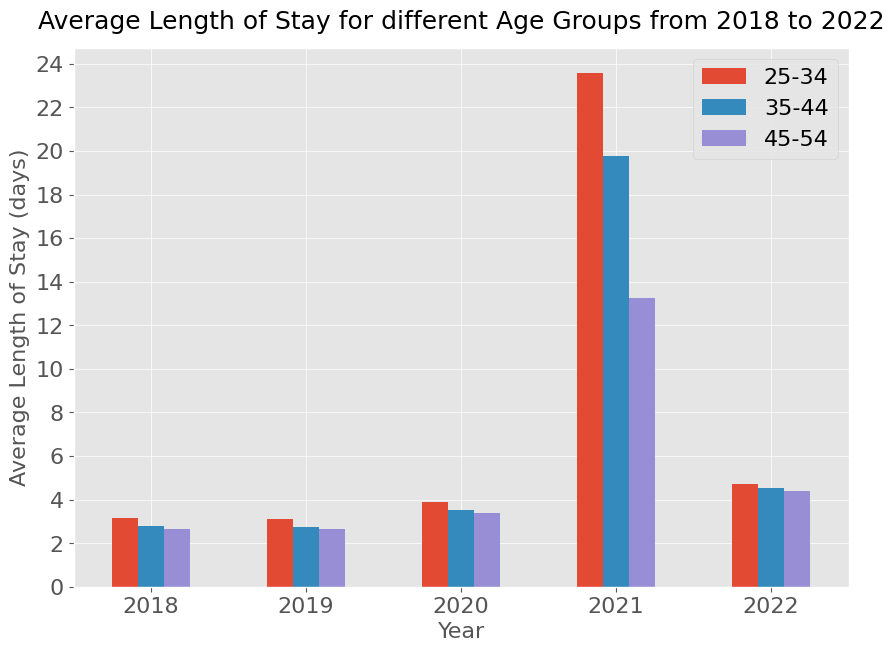

In [19]:
pv = los.pivot("Year", "Age Group", "Average Length of Stay").loc[:, ['25-34', '35-44', '45-54']]
pv.plot(kind='bar', figsize=(10,7))
plt.title('Average Length of Stay for different Age Groups from 2018 to 2022', fontsize=18, y=1.02)
plt.ylabel('Average Length of Stay (days)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.yticks([x for x in range(0,25,2)], fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.legend(fontsize=16)
plt.savefig('img/los.png', bbox_inches='tight')
plt.show()

/var/folders/l3/2pgq90f125lbwlmh0s3lrt4m0000gp/T/ipykernel_14624/714289024.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  los.pivot("Year", "Age Group", "Average Length of Stay").plot(kind='bar')


<AxesSubplot: xlabel='Year'>

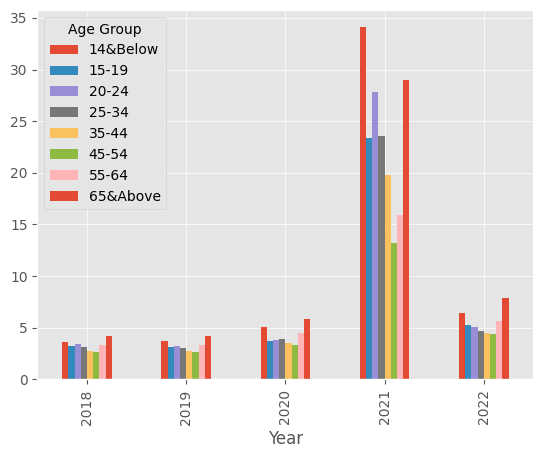

In [20]:
los.pivot("Year", "Age Group", "Average Length of Stay").plot(kind='bar')